In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import listdir
import itertools
from Bio.Seq import Seq
import numpy as np
import logomaker

In [2]:
lsize=14
titlesize=16
axesthickness = 1.5
flierprops = dict(marker='.',markersize=2)
boxplot_kwargs = {'widths':0.65, 'vert':True, 'patch_artist':True, 'boxprops':dict(facecolor='#FEFBF3'), 'whis':[5, 95]}
bar_kwargs = {'color':'#C5DEFF', 'edgecolor':'#000000', 'capsize':4, 'linewidth':1.5}
plt.rcParams['axes.linewidth'] = axesthickness
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
def list_files1(directory):
    return [f for f in listdir(directory) if ('.csv' in f) and ('0627' in f)]

In [4]:
path = 'Library/AverageFiles/'
filelist = list_files1(path)


In [5]:
filelist

['20220627_control_averagedf.csv',
 '20220627_p551evo_averagedf.csv',
 '20220627_p551wlt_averagedf.csv',
 '20220627_p552evo_averagedf.csv',
 '20220627_p552wlt_averagedf.csv',
 '20220627_p553evo_averagedf.csv',
 '20220627_p553wlt_averagedf.csv',
 '20220627_p554evo_averagedf.csv',
 '20220627_p554wlt_averagedf.csv',
 '20220627_p555evo_averagedf.csv',
 '20220627_p555wlt_averagedf.csv',
 '20220627_p556evo_averagedf.csv',
 '20220627_p556wlt_averagedf.csv',
 '20220627_p557evo_averagedf.csv',
 '20220627_p557wlt_averagedf.csv',
 '20220627_p558evo_averagedf.csv',
 '20220627_p558wlt_averagedf.csv',
 '20220627_p559evo_averagedf.csv',
 '20220627_p559wlt_averagedf.csv']

In [6]:
nucleaseeditorlist = [('p551wlt','CjCas9-WT'),('p551evo','CjCas9-Evo')]

summarydict = {}
summarydict_allreps = {}
for (editorshortname, editor) in nucleaseeditorlist:
    df = pd.read_csv('../Nuclease/BE_Library_Nuclease/AnalysisFiles/summary/20221004_'+editorshortname+'_analysis_dataframe.csv')
    df = df[df['Unnamed: 0.1'] > 0]  # only keep rows which do not have mismatches in protospacer etc. for this analysis
    df = df[df[editorshortname+'_averageindel'] > -100]  # filter away all empty rows
    df = df[df['PAM'] != 'various']
    canonicalPAMlist = ['ACAC','ATAC','GTAC','GCAC']
    noncanonicalPAMlist = ['AAAC','CAAC','GAAC','TAAC']
    allpamlist = canonicalPAMlist + noncanonicalPAMlist
    
    # Create empty dictionary with all PAMs
    allPAMdict = {}
    for PAM in allpamlist:
        allPAMdict[editorshortname+"_"+PAM] = []
        
    # Create empty dictionary for all replicates with all PAMs
    allPAMrepsdict = {}
    for PAM in allpamlist:
        allPAMrepsdict[editorshortname+"_"+PAM] = []
    
    # Fill dictionary with editing values for different motifs:
    for index, row in df.iterrows():
        editingvalue = df.at[index,editorshortname+'_averageindel']
        PAM = row.PAM
        if editingvalue < 0:  # cap editingvalues at zero after subtracting control (negative values are not possible for editing)
            editingvalue = 0
        if editingvalue > -100:  # only check for positions where there is a value (which means there is a target base at this position)
            allPAMdict[editorshortname+"_"+PAM].append(editingvalue)
            
            
     # Fill dictionary with editing values for different motifs WITH ALL REPLICATE VALUES:
    for index, row in df.iterrows():
        for rep in ['1','2','3']:
            editingvalue = df.at[index,editorshortname+'_'+rep+'_percentageindel_corrected_individual']
            PAM = row.PAM
            if editingvalue < 0:  # cap editingvalues at zero after subtracting control (negative values are not possible for editing)
                editingvalue = 0
            if editingvalue > -100:  # only check for positions where there is a value (which means there is a target base at this position)
                allPAMrepsdict[editorshortname+"_"+PAM].append(editingvalue)
                
    summarydict[editorshortname] = allPAMdict
    summarydict_allreps[editorshortname] = allPAMrepsdict

summarydict['p551wlt'].update(summarydict['p551evo'])    
summarydict_allreps['p551wlt'].update(summarydict_allreps['p551evo'])

summarydict = summarydict['p551wlt']
summarydict_allreps = summarydict_allreps['p551wlt']

summarydf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in summarydict.items() ]))
summary_allrepsdf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in summarydict_allreps.items() ]))

summarydf.to_csv('Library/figures/20221019_p551_efficiencies_per_PAM_averagereplicates.csv')
summary_allrepsdf.to_csv('Library/figures/20221019_p551_efficiencies_per_PAM_individualreplicates.csv')

In [7]:
allpamlist

['ACAC', 'ATAC', 'GTAC', 'GCAC', 'AAAC', 'CAAC', 'GAAC', 'TAAC']

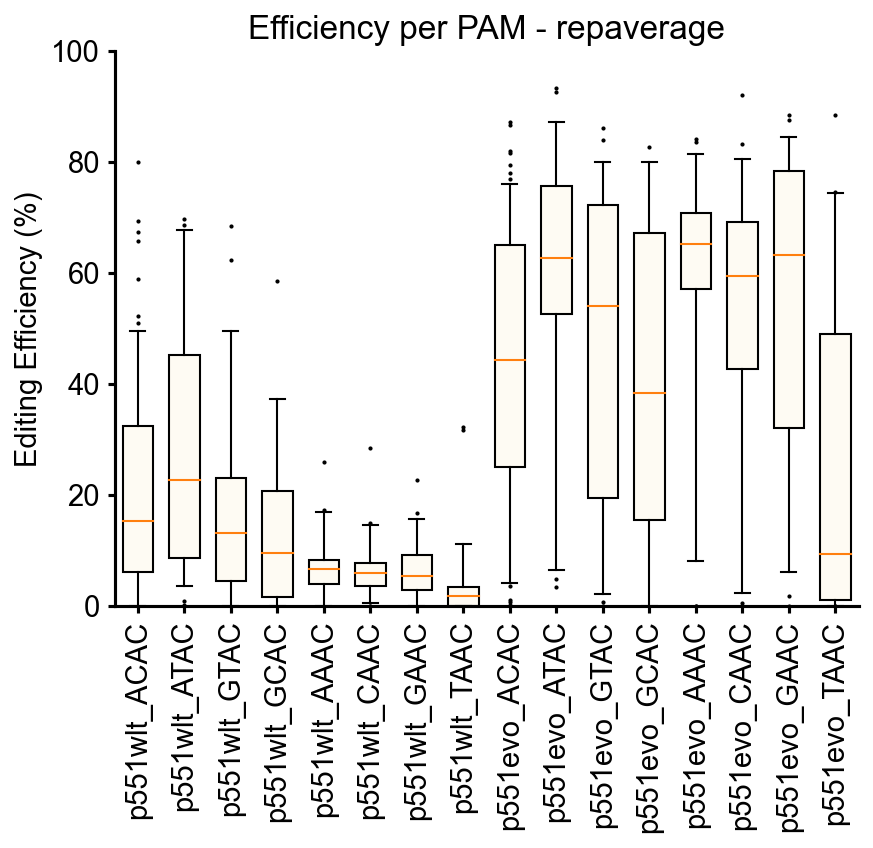

In [8]:
allpossiblepams = list(summarydf.columns)
editinglist = []
for motif in list(allpossiblepams):
    editinglist.append(summarydict[motif])
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Efficiency per PAM - repaverage', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allpossiblepams)
ax11.set_ylabel('Editing Efficiency (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221019_p551_Efficiencies_per_PAM_averagereplicates_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

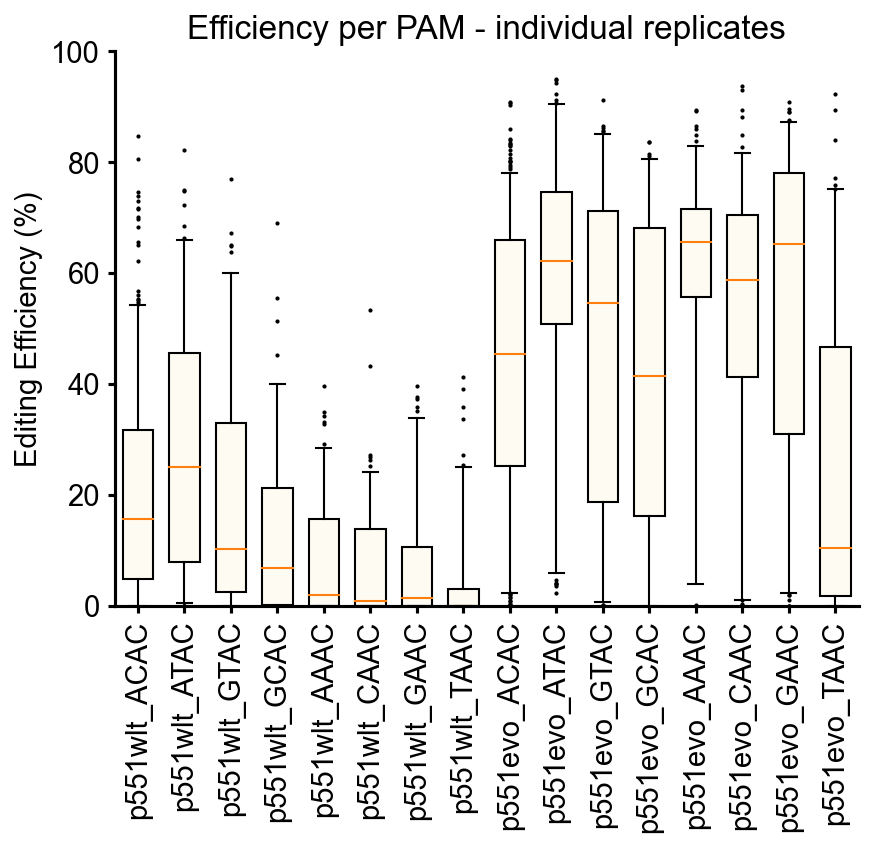

In [9]:
allpossiblepams = list(summary_allrepsdf.columns)
editinglist = []
for motif in list(allpossiblepams):
    editinglist.append(summarydict_allreps[motif])
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Efficiency per PAM - individual replicates', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allpossiblepams)
ax11.set_ylabel('Editing Efficiency (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221019_p551_Efficiencies_per_PAM_individualreplicates_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

## Analyse trinucleotide motifs for ABE8e, CBE4max and eAID in CjBE-Library

254


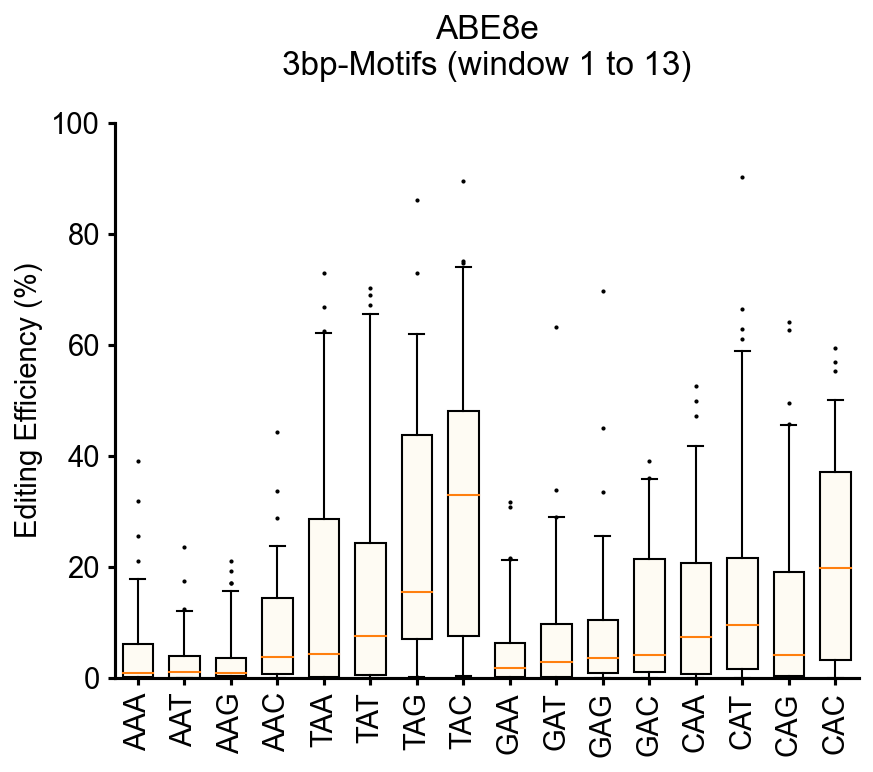

254


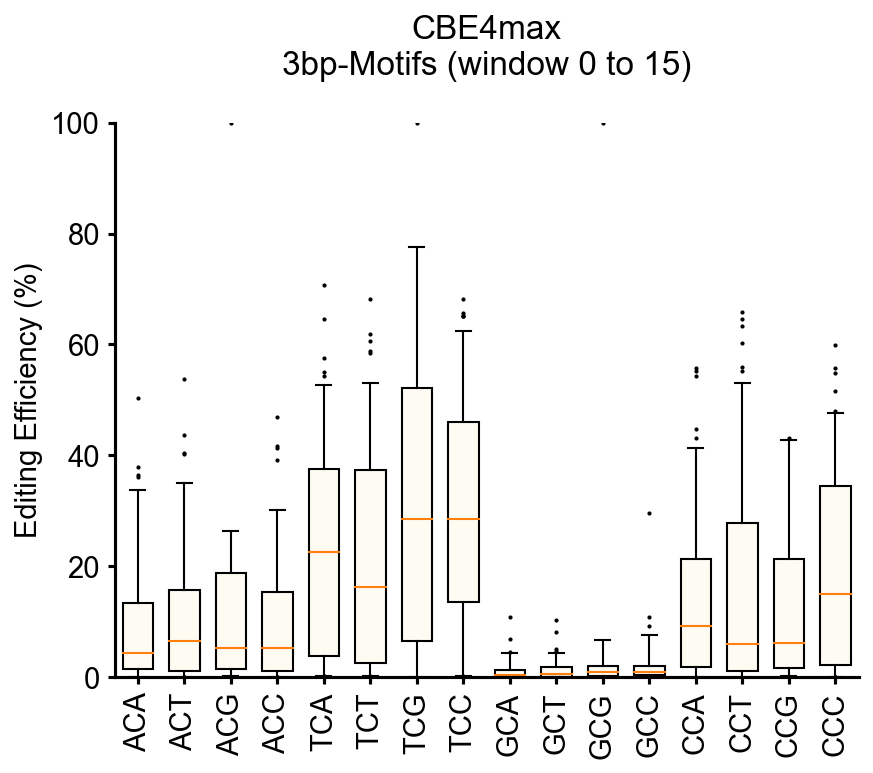

254


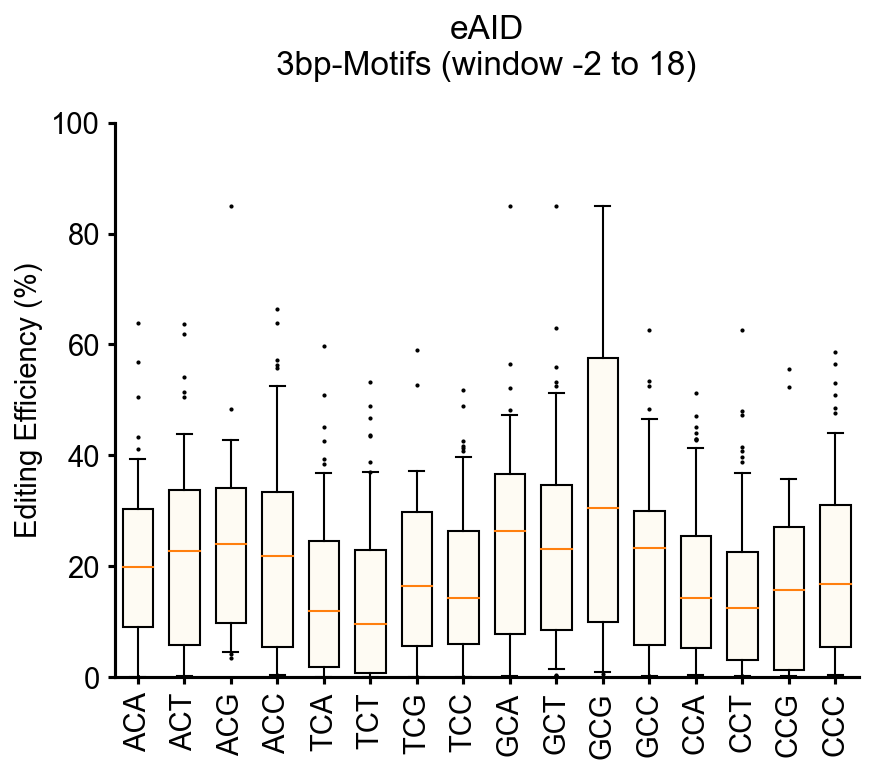

254


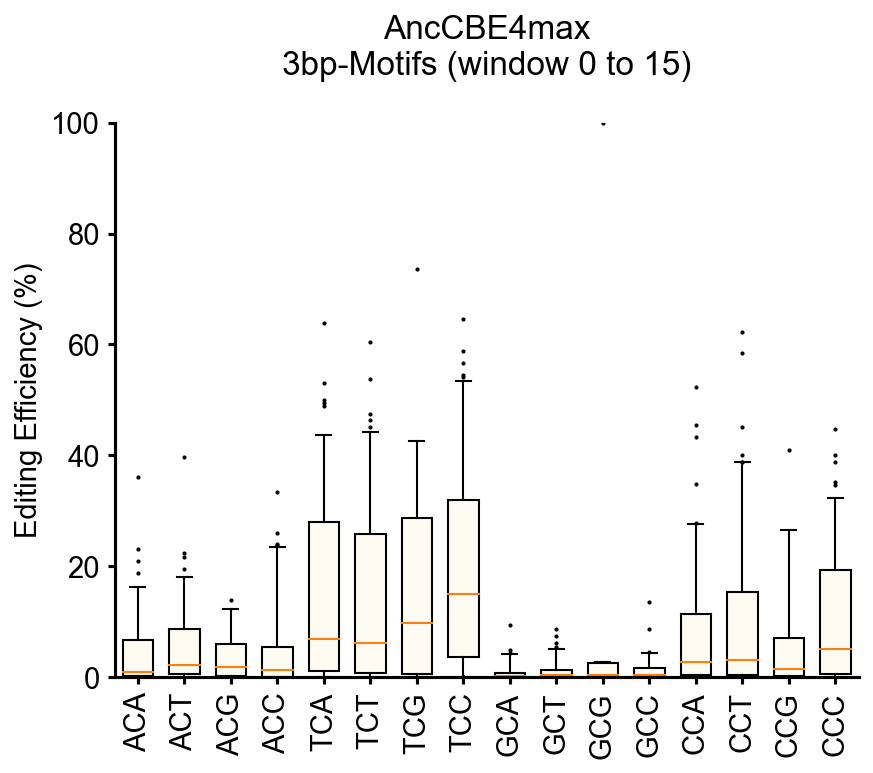

254


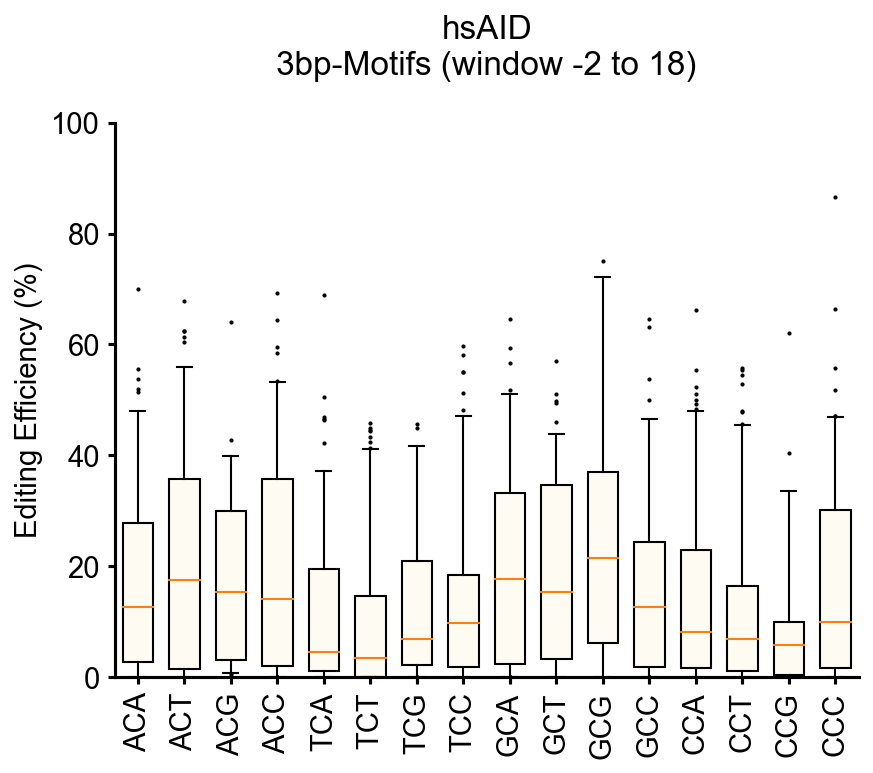

254


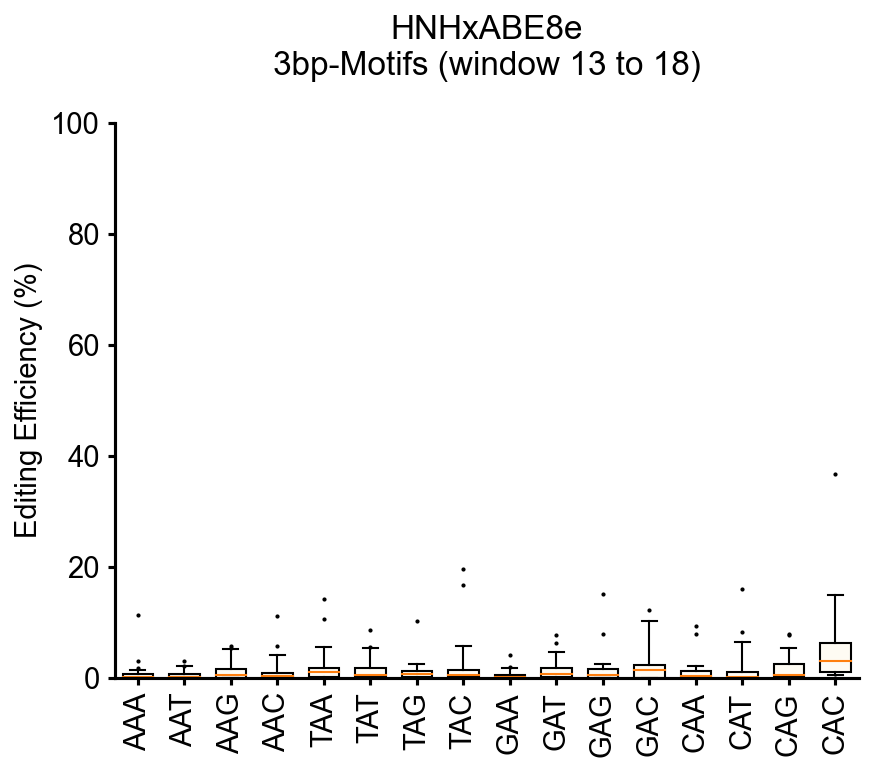

In [10]:
motifanalysislist = [('p552evo','A','ABE8e',1,13),('p554evo','C','CBE4max',0,15),('p559evo','C','eAID',-2,18),('p555evo','C','AncCBE4max', 0,15), ('p556evo','C','hsAID', -2,18), ('p558evo','A','HNHxABE8e', 13, 18)]

for (editorshortname, base, editor, start, end) in motifanalysislist:
    
    # Define columnlist to check for editing efficiencies of respective base:
    if base == 'A':
        collist = [str(x)+'_AtoG_editing_average_ctrladjusted' for x in range(start,end+1)]
    if base == 'C':
        collist = [str(x)+'_CtoT_editing_average_ctrladjusted' for x in range(start,end+1)]
    
    df = pd.read_csv('Library/AverageFiles/20220627_'+editorshortname+'_averagedf.csv')
    df = df[df['Unnamed: 0.1'] > 0]  # only keep rows which do not have mismatches in protospacer etc. for this analysis
    df = df[df['percent_modified_average_ctrladjusted'] > -100]  # filter away all empty rows
    
    # protoplusseq corresponds to bases around spacer (-8-22) +/- one base to get 3bp motifs
    df['protoplusseq'] = df.apply(lambda x: str(Seq(x['Target-SequenceReady'][12+23-x['Protospacer_Length']+8-1:12+23-x['Protospacer_Length']+23+20]).reverse_complement()),axis=1)
    
    print(len(df))

    # Define all possible tri-nucleotide-motifs for A or C, depending on the base in the motifanalysislist:
    allpossiblemotiflist = []
    bases = ['A','T','G','C']
    for base1 in bases:
        for base3 in bases:
            allpossiblemotiflist.append(base1+base+base3)

    # Create empty dictionary with all tri-nucleotide-motifs
    allpossiblemotifdict = {}
    for motif in allpossiblemotiflist:
        allpossiblemotifdict[motif] = []
    
    # Fill dictionary with editing values for different motifs:
    for index, row in df.iterrows():
        for column in collist:
            editingvalue = df.at[index,column]
            if editingvalue < 0:  # cap editingvalues at zero after subtracting control (negative values are not possible for editing)
                editingvalue = 0
            if editingvalue > -100:  # only check for positions where there is a value (which means there is a target base at this position)
                position_within_protoplusseq = int(column.split('_')[0]) + 9
                trinucleotidemotif = row.protoplusseq[position_within_protoplusseq-1:position_within_protoplusseq+2]
                allpossiblemotifdict[trinucleotidemotif].append(editingvalue)

    
    # Save datapoints of dictionary in .csv file
    allpossiblemotifdf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in allpossiblemotifdict.items() ]))
    allpossiblemotifdf.to_csv('Library/figures/20221019_'+editorshortname+'_'+editor+'_3bp-motif_datapoints.csv')
    
    
    # Create boxplot visualizing editing rates for each motif:
    motifboxplotlist = []
    for motif in list(allpossiblemotiflist):
        motifboxplotlist.append(allpossiblemotifdict[motif])
    fig11, ax11 = plt.subplots(dpi=150)
    ax11.set_title(editor+'\n3bp-Motifs (window '+str(start)+' to '+str(end)+')\n', fontsize=titlesize)
    ax11.boxplot(motifboxplotlist,**boxplot_kwargs, flierprops = flierprops)
    ax11.set_xticklabels(allpossiblemotiflist)
    ax11.set_ylabel('Editing Efficiency (%)', fontsize=lsize)
    ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
    ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
    ax11.spines['right'].set_visible(False)
    ax11.spines['top'].set_visible(False)
    ax11.tick_params(axis='x', labelrotation=90)
    ax11.set_ylim(0,100)
    figurepath = 'Library/figures/'
    plt.savefig(figurepath+'20221019_'+editorshortname+'_'+editor+'_3bp-motif_Boxplots.pdf', format='pdf',transparent=True,bbox_inches='tight')
    plt.show()

### Convert Average files into .csv files suitable for plotting of PAM splitted graphs

In [11]:
savepath = 'Library/AverageFiles/PAMplotting/'

# create dataframe which will contain the number of spacers available in the buckets "canonical" and "noncanonical" for each editor
spacercountdf = pd.DataFrame()
namelist = []
canonicalnrlist = []
noncanonicalnrlist = []

filelistforlater = []
for file in filelist:
    name = file.split('_')[1]
    df = pd.read_csv(path+file)

    #filter for self-targeting variants which can be used for following analysis (low coverage or mismatch protosopacers)
    removegenes = ['ALDH4A1','DYRK1A','?MECP2','?PTEN','?EMX1']
    df = df[~df['Gene'].isin(removegenes)]
    df = df[df['PAM'] != 'various']
    df = df[df['highcoveragereps'] == 3]
    df = df[df['controlhighcoveragereps'] == 3]
    
    pamuniquelist = list(df.PAM.unique())
    collist = list(df.columns)
    adjustlist = [x for x in collist if 'ctrladjust' in x]
    #adjustlist = [x for x in adjustlist if not 'average' in x]
    adjustlist = [x for x in adjustlist if 'average' in x]
    #adjustlist = [x for x in collist if 'average' in x]
    AtoGcolumns = [x for x in adjustlist if 'AtoG' in x]
    CtoTcolumns = [x for x in adjustlist if 'CtoT' in x]
    AtoG = False
    CtoT = False
    if '1_CtoT_editing_average_ctrladjusted' in adjustlist:
        CtoT = True
    if '1_AtoG_editing_average_ctrladjusted' in adjustlist:
        AtoG = True


     # calculate number of spacers that are used to quantify editing for each editor (excluding ctrl)
    if not 'ctrl' in file:
        namelist.append(name)
        
        canonical_pams = ['ACAC', 'ATAC', 'GTAC', 'GCAC']
        non_canonical_pams = ['AAAC', 'CAAC', 'GAAC', 'TAAC']

        # count how many rows have a canonical PAM in the 'PAM' column
        canonical_pam_count = df['PAM'].isin(canonical_pams).sum()
        non_canonical_pam_count = df['PAM'].isin(non_canonical_pams).sum()

        canonicalnrlist.append(canonical_pam_count)
        noncanonicalnrlist.append(non_canonical_pam_count)
        print(file)
        print('canonical PAMs: ', canonical_pam_count)
        print('non-canonical PAMs: ', non_canonical_pam_count)
        
    allPAMdfAtoG = pd.DataFrame()
    allPAMdfCtoT = pd.DataFrame()
    for PAM in pamuniquelist:
        if AtoG == True:
            PAMdf = df[df['PAM'] == PAM]
            PAMdf = PAMdf[AtoGcolumns]
            PAMdf = PAMdf.transpose()
            # clip all numeric values (excluding NaN) below 0 to zero:
            num = PAMdf._get_numeric_data()
            num[num < 0] = 0
            
            colnr = len(PAMdf.columns)
            for x in range(51-colnr):
                PAMdf['empty'+str(x)] = None
            PAMdf = PAMdf.add_prefix(PAM+'_')
            allPAMdfAtoG = pd.concat([allPAMdfAtoG, PAMdf], axis=1)
            #allPAMdfAtoG = allPAMdfAtoG.transpose()
            filelistforlater.append('20230501_'+name+'_allPAMdfAtoG.csv')
            allPAMdfAtoG.to_csv(savepath+'20230501_'+name+'_allPAMdfAtoG.csv')
        if CtoT == True:
            PAMdf = df[df['PAM'] == PAM]
            PAMdf = PAMdf[CtoTcolumns]
            PAMdf = PAMdf.transpose()
            # clip all numeric values (excluding NaN) below 0 to zero:
            num = PAMdf._get_numeric_data()
            num[num < 0] = 0
            
            colnr = len(PAMdf.columns)
            for x in range(51-colnr):
                PAMdf['empty'+str(x)] = None
            PAMdf = PAMdf.add_prefix(PAM+'_')
            allPAMdfCtoT = pd.concat([allPAMdfCtoT, PAMdf], axis=1)
            #allPAMdfCtoT = allPAMdfCtoT.transpose()
            filelistforlater.append('20230501_'+name+'_allPAMdfCtoT.csv')
            allPAMdfCtoT.to_csv(savepath+'20230501_'+name+'_allPAMdfCtoT.csv')


spacercountdf['editor'] = namelist
spacercountdf['nr_of_canonical_spacers_analyzed'] = canonicalnrlist
spacercountdf['nr_of_noncanonical_spacers_analyzed'] = noncanonicalnrlist
averagepath = 'Library/AverageFiles/'
spacercountdf.to_csv(averagepath+'20230504_spacercount_canonical_non_canonical_firstBElibscreen.csv')

20220627_control_averagedf.csv
canonical PAMs:  153
non-canonical PAMs:  169
20220627_p551evo_averagedf.csv
canonical PAMs:  151
non-canonical PAMs:  168
20220627_p551wlt_averagedf.csv
canonical PAMs:  146
non-canonical PAMs:  164
20220627_p552evo_averagedf.csv
canonical PAMs:  149
non-canonical PAMs:  165
20220627_p552wlt_averagedf.csv
canonical PAMs:  145
non-canonical PAMs:  155
20220627_p553evo_averagedf.csv
canonical PAMs:  146
non-canonical PAMs:  164
20220627_p553wlt_averagedf.csv
canonical PAMs:  148
non-canonical PAMs:  165
20220627_p554evo_averagedf.csv
canonical PAMs:  150
non-canonical PAMs:  165
20220627_p554wlt_averagedf.csv
canonical PAMs:  140
non-canonical PAMs:  152
20220627_p555evo_averagedf.csv
canonical PAMs:  152
non-canonical PAMs:  168
20220627_p555wlt_averagedf.csv
canonical PAMs:  146
non-canonical PAMs:  162
20220627_p556evo_averagedf.csv
canonical PAMs:  152
non-canonical PAMs:  168
20220627_p556wlt_averagedf.csv
canonical PAMs:  150
non-canonical PAMs:  163

In [25]:
filelistforlater = list(set(filelistforlater))
# remove files with "control" in name
filelistforlater = [x for x in filelistforlater if not 'control' in x]


for file in filelistforlater:
    df = pd.read_csv(savepath+file)
    df = df.set_index("Unnamed: 0")
    editor = file.split('_')[1]

    # Separate canonical and non-canonical PAMs
    canonical_pams = ['ACAC', 'ATAC', 'GTAC', 'GCAC']
    non_canonical_pams = ['AAAC', 'CAAC', 'GAAC', 'TAAC']

    # Filter columns for canonical and non-canonical PAMs
    canonical_columns = [col for col in df.columns if any(pam in col for pam in canonical_pams)]
    non_canonical_columns = [col for col in df.columns if any(pam in col for pam in non_canonical_pams)]



    # Calculate average editing, standard deviation and number of cells with a value
    result = []

    for i, row in df.iterrows():
        canonical_values = row[canonical_columns].dropna().astype(float)
        non_canonical_values = row[non_canonical_columns].dropna().astype(float)

        canonical_mean = canonical_values.mean()
        non_canonical_mean = non_canonical_values.mean()

        canonical_std = canonical_values.std()
        non_canonical_std = non_canonical_values.std()

        canonical_n = len(canonical_values)
        non_canonical_n = len(non_canonical_values)

        result.append({
            'position': i,
            'canonical_mean': canonical_mean,
            'canonical_n': canonical_n,
            'canonical_std': canonical_std,
            'non_canonical_mean': non_canonical_mean,
            'non_canonical_std': non_canonical_std,
            'non_canonical_n': non_canonical_n
        })

    result_df = pd.DataFrame(result)
    if 'allPAMdfCtoT' in file:
        result_df.to_csv(savepath+'20230501_'+editor+'_allPAMdfCtoT_newformat.csv', index=False)
    elif 'allPAMdfAtoG' in file:
        result_df.to_csv(savepath+'20230501_'+editor+'_allPAMdfAtoG_newformat.csv', index=False)

37

In [14]:
savepath = 'Library/AverageFiles/PAMplotting/'

for file in filelist:
    name = file.split('_')[1]
    print(name)
    df = pd.read_csv(path+file)

    #filter for self-targeting variants which can be used for following analysis (low coverage or mismatch protosopacers)
    removegenes = ['ALDH4A1','DYRK1A','?MECP2','?PTEN','?EMX1']
    df = df[~df['Gene'].isin(removegenes)]
    df = df[df['PAM'] != 'various']
    df = df[df['highcoveragereps'] == 3]
    df = df[df['controlhighcoveragereps'] == 3]
    
    pamuniquelist = list(df.PAM.unique())
    collist = list(df.columns)
    adjustlist = [x for x in collist if 'adjust' in x]
    adjustlist = [x for x in collist if not 'average' in x]
    AtoGcolumns = [x for x in adjustlist if 'AtoG' in x]
    CtoTcolumns = [x for x in adjustlist if 'CtoT' in x]
    AtoGcolumnlist = []
    CtoTcolumnlist = []
    for PAM in pamuniquelist:
        for col in ['AtoG_editing_rep1_ctrladjusted',
     'AtoG_editing_rep2_ctrladjusted',
     'AtoG_editing_rep3_ctrladjusted']:
            AtoGcolumnlist.append(PAM+'_'+col)
        for col in ['CtoT_editing_rep1_ctrladjusted',
     'CtoT_editing_rep2_ctrladjusted',
     'CtoT_editing_rep3_ctrladjusted']:
            CtoTcolumnlist.append(PAM+'_'+col)
    
    CtoT = False
    AtoG = False
    if '-9_CtoT_editing_rep1_ctrladjusted' in adjustlist:
        CtoT = True
    if '-9_AtoG_editing_rep1_ctrladjusted' in adjustlist:
        AtoG = True
    
    AtoGtempdf = pd.DataFrame(columns = AtoGcolumnlist, index=range(-9,23))
    CtoTtempdf = pd.DataFrame(columns = CtoTcolumnlist, index=range(-9,23))
    
    #allPAMdfAtoG = pd.DataFrame()
    #allPAMdfCtoT = pd.DataFrame()

    for position in range(-9,23):
        if AtoG == True:
            for col in AtoGcolumnlist:
                PAM = col[:4]
                value = df[df['PAM'] == PAM][str(position)+'_'+col[5:]].mean()
                #print(position, PAM, col, value)
                if value < 0:
                    value = 0
                        
                AtoGtempdf.at[position,col] = value
                
            AtoGtempdf.to_csv(savepath+'20220627_'+name+'_allreps_AtoG.csv')
        
        if CtoT == True:
            for col in CtoTcolumnlist:
                PAM = col[:4]
                value = df[df['PAM'] == PAM][str(position)+'_'+col[5:]].mean()
                #print(position, PAM, col, value)
                if value < 0:
                    value = 0
                        
                CtoTtempdf.at[position,col] = value
                
            CtoTtempdf.to_csv(savepath+'20220627_'+name+'_allreps_CtoT.csv')

control
p551evo
p551wlt
p552evo
p552wlt
p553evo
p553wlt
p554evo
p554wlt
p555evo
p555wlt
p556evo
p556wlt
p557evo
p557wlt
p558evo
p558wlt
p559evo
p559wlt


In [15]:
df[df['PAM'] == PAM][str(position)+'_'+col[5:]].mean()

0.16120840148674606

In [16]:
AtoGcolumnlist

['TAAC_AtoG_editing_rep1_ctrladjusted',
 'TAAC_AtoG_editing_rep2_ctrladjusted',
 'TAAC_AtoG_editing_rep3_ctrladjusted',
 'GTAC_AtoG_editing_rep1_ctrladjusted',
 'GTAC_AtoG_editing_rep2_ctrladjusted',
 'GTAC_AtoG_editing_rep3_ctrladjusted',
 'GCAC_AtoG_editing_rep1_ctrladjusted',
 'GCAC_AtoG_editing_rep2_ctrladjusted',
 'GCAC_AtoG_editing_rep3_ctrladjusted',
 'GAAC_AtoG_editing_rep1_ctrladjusted',
 'GAAC_AtoG_editing_rep2_ctrladjusted',
 'GAAC_AtoG_editing_rep3_ctrladjusted',
 'CAAC_AtoG_editing_rep1_ctrladjusted',
 'CAAC_AtoG_editing_rep2_ctrladjusted',
 'CAAC_AtoG_editing_rep3_ctrladjusted',
 'ATAC_AtoG_editing_rep1_ctrladjusted',
 'ATAC_AtoG_editing_rep2_ctrladjusted',
 'ATAC_AtoG_editing_rep3_ctrladjusted',
 'ACAC_AtoG_editing_rep1_ctrladjusted',
 'ACAC_AtoG_editing_rep2_ctrladjusted',
 'ACAC_AtoG_editing_rep3_ctrladjusted',
 'AAAC_AtoG_editing_rep1_ctrladjusted',
 'AAAC_AtoG_editing_rep2_ctrladjusted',
 'AAAC_AtoG_editing_rep3_ctrladjusted']

In [17]:
AtoGcolumnlist = []
CtoTcolumnlist = []
for PAM in pamuniquelist:
    for col in ['AtoG_editing_rep1_ctrladjusted',
 'AtoG_editing_rep2_ctrladjusted',
 'AtoG_editing_rep3_ctrladjusted']:
        AtoGcolumnlist.append(PAM+'_'+col)
    for col in ['CtoT_editing_rep1_ctrladjusted',
 'CtoT_editing_rep2_ctrladjusted',
 'CtoT_editing_rep3_ctrladjusted']:
        CtoTcolumnlist.append(PAM+'_'+col)

In [18]:
AtoGtempdf = pd.DataFrame(columns = AtoGcolumnlist, index=range(-9,23))
CtoTtempdf = pd.DataFrame(columns = CtoTcolumnlist, index=range(-9,23))

In [19]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Gene,Phenotype,PAM,ABE pos,CBE pos,Sequence,Reverse-Complement,...,20_AtoG_editing_rep3_ctrladjusted,21_AtoG_editing_average_ctrladjusted,21_AtoG_editing_rep1_ctrladjusted,21_AtoG_editing_rep2_ctrladjusted,21_AtoG_editing_rep3_ctrladjusted,22_AtoG_editing_average_ctrladjusted,22_AtoG_editing_rep1_ctrladjusted,22_AtoG_editing_rep2_ctrladjusted,22_AtoG_editing_rep3_ctrladjusted,percent_modified_average_ctrladjusted
1,1,161.0,NM_004958.4(MTOR):c.6625C>G (p.Leu2209Val),MTOR,Metastatic pancreatic neuroendocrine tumours,TAAC,NaN,NaN,TACCTGAGGTTTTTCCGAAGAGATGTTGGGTCATTGGCCAGAAGGG...,TGAGCGTGTGATGCAGCTCTTCGGCCTGGTTAACACCCTTCTGGCC...,...,0.316327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,200.0,NM_005957.4(MTHFR):c.604C>A (p.Pro202Thr),MTHFR,Homocysteinemia due to MTHFR deficiency,TAAC,NaN,NaN,TTCAAGTGCTTCAGGTCAGCCTCAAAGCTCCCTGCTTCGGGGTGGC...,CTGACTGTCATCCCTATTGGCAGGTTACCCCAAAGGCCACCCCGAA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.464791
3,3,248.0,NM_014874.3(MFN2):c.703C>T (p.Gln235Ter),MFN2,"Charcot-Marie-Tooth disease, type 2",TAAC,NaN,NaN,TGTGTTTGTGCTGGTGGCCAACTCAGAGTCCACCCTGATGCAGACG...,GCTGGGAGCTTGGGAGAAGGCAGAGGAGGAGTTACCGTCTGCATCA...,...,NaN,0.214485,0.289045,0.289045,0.065366,NaN,NaN,NaN,NaN,-1.582125
4,4,347.0,NM_003000.2(SDHB):c.287-1G>C,SDHB,Gastrointestinal stroma tumor;Hereditary Parag...,TAAC,NaN,NaN,TTGCCTCCATTGATGTTCATTGCACAAGAGCCACAGATGCCTGAAA...,CGGATATGGGTGAGGATGTGTTAAATGTGTGTCTCTTTCAGGCATC...,...,-0.257154,NaN,NaN,NaN,NaN,-0.161274,-0.206049,-0.206049,-0.071725,3.378732
5,5,423.0,NM_000478.6(ALPL):c.620A>C (p.Gln207Pro),ALPL,Infantile hypophosphatasia;not provided,TAAC,NaN,NaN,CCTGAGGCCTTGAGCCAGGGCTGTAAGGACATCGCCTACCAGCTCA...,CCGAGCACTCACGTCAATGTCCCTGATGTTATGCATGAGCTGGTAG...,...,NaN,NaN,NaN,NaN,NaN,-0.081967,-0.081967,-0.081967,-0.081967,-3.657833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,463,10523.0,NM_000055.4(BCHE):c.1183G>T (p.Glu395Ter),BCHE,Deficiency of butyrylcholine esterase,AAAC,NaN,NaN,TGATCATCTACCCAGTCTGTGTAATGAAAAAGGATGGATTCCTTTC...,TTTAAAAATATTTTTTCCAGGAGTGAGTGAGTTTGGAAAGGAATCC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.285145
464,464,10540.0,NM_007217.4(PDCD10):c.395+2T>G,PDCD10,not provided,AAAC,NaN,NaN,GTACTTTTAAGAAAAGAAGAAACAAAACAAATAATTGCTTACTTGA...,TGAGATCAATGACAGAGTGAGGTTTCTGCAGACAATCAAGTAAGCA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.827148
465,465,10550.0,NM_005025.4(SERPINI1):c.1174G>A (p.Gly392Arg),SERPINI1,"Encephalopathy, familial, with neuroserpin inc...",AAAC,NaN,NaN,TGTTTACTTCTGAACCAATACAGGTACAATTCTATTCATGGGACGA...,TGTCCACTTGTGTTCATTGTTTCAGGATGCATGACTCGTCCCATGA...,...,NaN,0.067137,0.000000,0.000000,0.201410,NaN,NaN,NaN,NaN,-1.174225
466,466,10567.0,NR_001566.1(TERC):n.117A>C,TERC,Aplastic anemia,AAAC,NaN,NaN,TGAACGGTGGAAGGCGGCAGGCCGAGGCTTTTCCGCCCGCTGAAAG...,TGCTTTTGCTCCCCGCGCGCTGTTTTTCTCGCTGACTTTCAGCGGG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.172836


In [20]:
df['21_AtoG_editing_average_ctrladjusted'].mean()

-0.03906699817555188

In [21]:
df['11_AtoG_editing_average_ctrladjusted'].mean()

0.34274920552186894

In [22]:
x = "CCCTATTGGCAGGTTACCCCAAAGGCCACACCGAAGCAGGGAGCTTTGAGGC"
print(str(Seq(x[12:12+8+23]).reverse_complement()))


CTCCCTGCTTCGGTGTGGCCTTTGGGGTAAC


## Create Sequence Logo Plot for CjCas-WT Nuclease

In [21]:
nuclease_df = pd.read_csv('Library/AverageFiles/20220627_p551wlt_averagedf.csv')
nuclease_df = nuclease_df[nuclease_df['Unnamed: 0.1'] > 0]  # only keep rows which do not have mismatches in protospacer etc. for this analysis
nuclease_df = nuclease_df[nuclease_df['percent_modified_average_ctrladjusted'] > -100]  # filter away all empty rows
nuclease_df['protopamseq'] = nuclease_df.apply(lambda x: str(Seq(x['Target-SequenceReady'][12+23-x['Protospacer_Length']+8:12+23-x['Protospacer_Length']+8+23]).reverse_complement()),axis=1)
print(len(nuclease_df))

basedistributiondict = {}
for pos in range(1,24):
        basedistributiondict[pos] = {}

for pos in range(1,24):
    for base in ['A','G','C','T']:
        basedistributiondict[pos][base] = [] 

254


In [22]:
for index, row in nuclease_df.iterrows():
    for ind, base in enumerate(row.protopamseq):
        #if ind+1 == 31:
        #    print(base, index, row['Protospacer-Sequence'],row.protopamseq,row.Protospacer_Length)
        basedistributiondict[ind+1][base].append(row.percent_modified_average_ctrladjusted)

In [23]:
averagebasedistributiondict = {}
for pos in range(1,24):
        averagebasedistributiondict[pos] = {}
for pos in range(1,24):
    for base in ['A','G','C','T']:
        if len(basedistributiondict[pos][base]) == 0:
            mean = None
        else:
            mean = sum(basedistributiondict[pos][base])/len(basedistributiondict[pos][base])
        averagebasedistributiondict[pos][base] = mean

In [24]:
logomakerdf = pd.DataFrame(columns=['pos','A','C','G','T'])
logomakerdf = logomakerdf.set_index('pos')
logomakerdf
for position in averagebasedistributiondict:
    for base in ['A','G','C','T']:
        logomakerdf.at[position,base] = averagebasedistributiondict[position][base]

averageall = nuclease_df.percent_modified_average_ctrladjusted.mean()
averageall
logomakerposnegdf = logomakerdf.copy() - averageall
logomakerposnegdf
#logomakerdf = logomakerdf.div(100)
type(logomakerdf)

pandas.core.frame.DataFrame

In [25]:
logomakerdf = logomakerdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))
logomakerdf = logomakerdf.fillna(0)
logomakerposnegdf = logomakerposnegdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))
logomakerposnegdf = logomakerposnegdf.fillna(0)

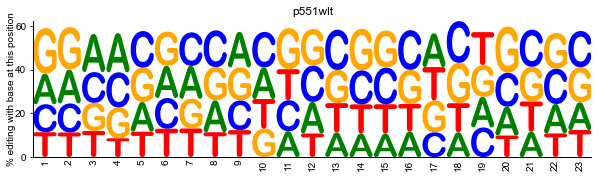

In [26]:
crp_logo = logomaker.Logo(logomakerdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("% editing with base at this position", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('p551wlt')

figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551wlt_CjWlt_Sequence_Logo_positive.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()


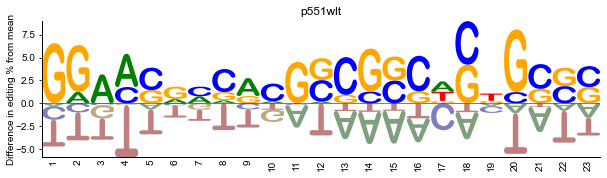

In [27]:

crp_logo = logomaker.Logo(logomakerposnegdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("Difference in editing % from mean", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('p551wlt')
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551wlt_CjWlt_Sequence_Logo_relativetomean.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()

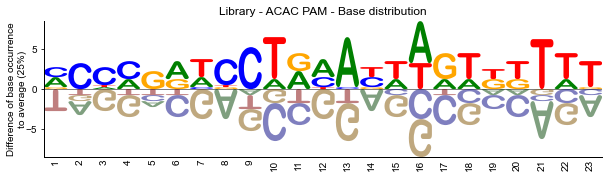

In [28]:
bestpam_nuclease_df = nuclease_df[nuclease_df['PAM'] == 'ACAC'].copy()
bestpam_nuclease_df


bestpam_basedistributiondict = {}
for pos in range(1,24):
        bestpam_basedistributiondict[pos] = {}

for pos in range(1,24):
    for base in ['A','G','C','T']:
        bestpam_basedistributiondict[pos][base] = [] 

for index, row in bestpam_nuclease_df.iterrows():
    for ind, base in enumerate(row.protopamseq):
        #if ind+1 == 31:
        #    print(base, index, row['Protospacer-Sequence'],row.protopamseq,row.Protospacer_Length)
        bestpam_basedistributiondict[ind+1][base].append(1)
        
sumbasedistributiondict = {}
for pos in range(1,24):
        sumbasedistributiondict[pos] = {}
for pos in range(1,24):
    for base in ['A','G','C','T']:
        if len(bestpam_basedistributiondict[pos][base]) == 0:
            summe = 0
        else:
            summe = sum(bestpam_basedistributiondict[pos][base])
        sumbasedistributiondict[pos][base] = summe
        
logomakerdf = pd.DataFrame(columns=['pos','A','C','G','T'])
logomakerdf = logomakerdf.set_index('pos')
logomakerdf
for position in sumbasedistributiondict:
    for base in ['A','G','C','T']:
        logomakerdf.at[position,base] = sumbasedistributiondict[position][base]

averageall = len(bestpam_nuclease_df)/4
averageall
logomakerposnegdf = logomakerdf.copy() - averageall
logomakerposnegdf = logomakerposnegdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))

#logomakerdf = logomakerdf.div(100)
type(logomakerdf)

crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)
crp_logo = logomaker.Logo(logomakerposnegdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("Difference of base occurrence\nto average (25%)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('Library - ACAC PAM - Base distribution')
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551wlt_CjEvo_ACACPAMONLY_Sequence_Logo_relativetomean.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()

## Create Sequence Logo Plots for CjCas-Evo Nuclease

In [29]:
nuclease_df = pd.read_csv('Library/AverageFiles/20220627_p551evo_averagedf.csv')
nuclease_df = nuclease_df[nuclease_df['Unnamed: 0.1'] > 0]  # only keep rows which do not have mismatches in protospacer etc. for this analysis
nuclease_df = nuclease_df[nuclease_df['percent_modified_average_ctrladjusted'] > -100]  # filter away all empty rows
nuclease_df['protopamseq'] = nuclease_df.apply(lambda x: str(Seq(x['Target-SequenceReady'][12+23-x['Protospacer_Length']+8:12+23-x['Protospacer_Length']+23+8]).reverse_complement()),axis=1)
print(len(nuclease_df))

basedistributiondict = {}
for pos in range(1,24):
        basedistributiondict[pos] = {}

for pos in range(1,24):
    for base in ['A','G','C','T']:
        basedistributiondict[pos][base] = [] 

254


In [30]:
for index, row in nuclease_df.iterrows():
    for ind, base in enumerate(row.protopamseq):
        #if ind+1 == 31:
        #    print(base, index, row['Protospacer-Sequence'],row.protopamseq,row.Protospacer_Length)
        basedistributiondict[ind+1][base].append(row.percent_modified_average_ctrladjusted)

In [31]:
averagebasedistributiondict = {}
for pos in range(1,24):
        averagebasedistributiondict[pos] = {}
for pos in range(1,24):
    for base in ['A','G','C','T']:
        if len(basedistributiondict[pos][base]) == 0:
            mean = None
        else:
            mean = sum(basedistributiondict[pos][base])/len(basedistributiondict[pos][base])
        averagebasedistributiondict[pos][base] = mean

In [32]:
logomakerdf = pd.DataFrame(columns=['pos','A','C','G','T'])
logomakerdf = logomakerdf.set_index('pos')
logomakerdf
for position in averagebasedistributiondict:
    for base in ['A','G','C','T']:
        logomakerdf.at[position,base] = averagebasedistributiondict[position][base]

averageall = nuclease_df.percent_modified_average_ctrladjusted.mean()
averageall
logomakerposnegdf = logomakerdf.copy() - averageall
logomakerposnegdf
#logomakerdf = logomakerdf.div(100)
type(logomakerdf)

pandas.core.frame.DataFrame

In [33]:
logomakerdf = logomakerdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))
logomakerdf = logomakerdf.fillna(0)
logomakerposnegdf = logomakerposnegdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))
logomakerposnegdf = logomakerposnegdf.fillna(0)

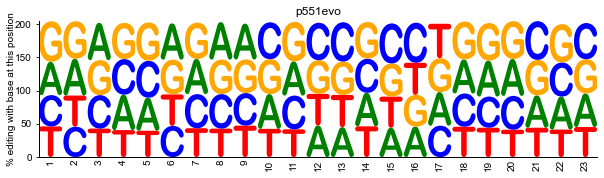

In [34]:
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)
crp_logo = logomaker.Logo(logomakerdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("% editing with base at this position", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('p551evo')
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551evo_CjEvo_Sequence_Logo_positive.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()

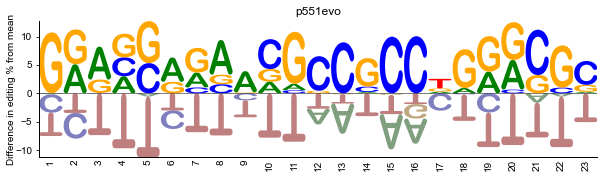

In [35]:
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)
crp_logo = logomaker.Logo(logomakerposnegdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("Difference in editing % from mean", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('p551evo')
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551evo_CjEvo_Sequence_Logo_relativetomean.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()

### Check base distribution for guides with the best (ACAC) PAM for CjCas9-evo

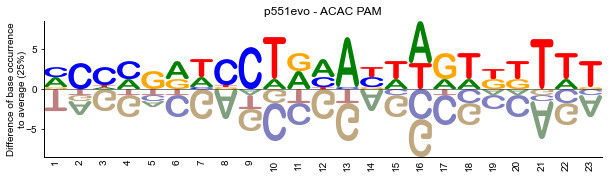

In [36]:
bestpam_nuclease_df = nuclease_df[nuclease_df['PAM'] == 'ACAC'].copy()
bestpam_nuclease_df

bestpam_basedistributiondict = {}
for pos in range(1,24):
        bestpam_basedistributiondict[pos] = {}

for pos in range(1,24):
    for base in ['A','G','C','T']:
        bestpam_basedistributiondict[pos][base] = [] 

for index, row in bestpam_nuclease_df.iterrows():
    for ind, base in enumerate(row.protopamseq):
        #if ind+1 == 31:
        #    print(base, index, row['Protospacer-Sequence'],row.protopamseq,row.Protospacer_Length)
        bestpam_basedistributiondict[ind+1][base].append(1)
        
sumbasedistributiondict = {}
for pos in range(1,24):
        sumbasedistributiondict[pos] = {}
for pos in range(1,24):
    for base in ['A','G','C','T']:
        if len(bestpam_basedistributiondict[pos][base]) == 0:
            summe = 0
        else:
            summe = sum(bestpam_basedistributiondict[pos][base])
        sumbasedistributiondict[pos][base] = summe
        
logomakerdf = pd.DataFrame(columns=['pos','A','C','G','T'])
logomakerdf = logomakerdf.set_index('pos')
logomakerdf
for position in sumbasedistributiondict:
    for base in ['A','G','C','T']:
        logomakerdf.at[position,base] = sumbasedistributiondict[position][base]

averageall = len(bestpam_nuclease_df)/4
averageall
logomakerposnegdf = logomakerdf.copy() - averageall
logomakerposnegdf = logomakerposnegdf.apply(lambda col:pd.to_numeric(col, errors='coerce'))

#logomakerdf = logomakerdf.div(100)
type(logomakerdf)

crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)
crp_logo = logomaker.Logo(logomakerposnegdf,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("Difference of base occurrence\nto average (25%)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)
crp_logo.ax.set_title('p551evo - ACAC PAM')
figurepath = 'Library/figures/'
plt.savefig(figurepath+'20221018_p551evo_CjEvo_ACACPAMONLY_Sequence_Logo_relativetomean.pdf', format='pdf',
        transparent=True,bbox_inches='tight')
plt.show()

## Create summary file for supplementary

In [8]:
writer = pd.ExcelWriter('SupplementaryTable3_CjCas_BE_Libraries.xlsx')

nucleasepath = "../Nuclease/BE_Library_Nuclease/AnalysisFiles/summary/"
def nuc_files(directory):
    return [f for f in listdir(directory) if ('dataframe.csv' in f)]
nuclist = nuc_files(nucleasepath)
for file in nuclist:
    editorname = file.split('_')[1]
    tempdf = pd.read_csv(nucleasepath+file)
    tempdf = tempdf.dropna(subset=['Unnamed: 0.1'])
    removecollist = ['Unnamed: 0','ABE pos', 'CBE pos','Unnamed: 21','Unnamed: 23']
    tempdf = tempdf.drop(columns=removecollist)
    tempdf.to_excel(writer, sheet_name=editorname, index=False)


def be_files(directory):
    return [f for f in listdir(directory) if ('0627' in f) and ('averagedf.csv' in f) and not ('control' in f or '551' in f)]

bepath = "Library/AverageFiles/"
baseeditingfilelist = be_files(bepath)

for file in baseeditingfilelist:
    editorname = file.split('_')[1]
    tempdf = pd.read_csv(bepath+file)
    tempdf = tempdf.dropna(subset=['Unnamed: 0.1'])
    removecollist = ['Unnamed: 0', 'ABE pos', 'CBE pos','Unnamed: 21','Unnamed: 23']
    tempdf = tempdf.drop(columns=removecollist)
    tempdf.to_excel(writer, sheet_name=editorname, index=False)
    

writer.save()